# Inferring missing values

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pickle

In [3]:
skus = pd.read_csv('file:///C:/Users/katarina_bedejova/Documents/time_series_sources/458928-B21.csv', header = None)
skus.columns = ['insert_date','vendor','item_code','country','curr','rolling3months']

In [4]:
skus

,insert_date,vendor,item_code,country,curr,rolling3months
0,2018-03-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,153.86
1,2018-11-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,70.58
2,2018-12-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,70.58
3,2019-01-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,70.58
4,2019-05-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,64.94
5,2019-06-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,68.03
6,2019-07-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,68.03
7,2019-08-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,71.13
8,2019-10-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,65.14
9,2019-11-01 00:00:00.000,HPE,458928-B21,Rest of Europe,EUR,132.10


In [5]:
min_date = skus.insert_date.min()
max_date = skus.insert_date.max()
min_date = str(min_date)[0:10]
max_date = str(max_date)[0:10]
print(min_date)
print(max_date)

2018-03-01
2019-11-01


In [6]:
idx = pd.date_range(min_date, max_date, freq='MS')

In [7]:
skus = skus.set_index('insert_date')

In [8]:
skus.index = pd.DatetimeIndex(skus.index)

In [9]:
print(skus)

            vendor   item_code         country curr  rolling3months
insert_date                                                        
2018-03-01     HPE  458928-B21  Rest of Europe  EUR          153.86
2018-11-01     HPE  458928-B21  Rest of Europe  EUR           70.58
2018-12-01     HPE  458928-B21  Rest of Europe  EUR           70.58
2019-01-01     HPE  458928-B21  Rest of Europe  EUR           70.58
2019-05-01     HPE  458928-B21  Rest of Europe  EUR           64.94
2019-06-01     HPE  458928-B21  Rest of Europe  EUR           68.03
2019-07-01     HPE  458928-B21  Rest of Europe  EUR           68.03
2019-08-01     HPE  458928-B21  Rest of Europe  EUR           71.13
2019-10-01     HPE  458928-B21  Rest of Europe  EUR           65.14
2019-11-01     HPE  458928-B21  Rest of Europe  EUR          132.10


In [10]:
skus = skus.reindex(idx, fill_value=np.NaN)

In [11]:
skus

,vendor,item_code,country,curr,rolling3months
2018-03-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-04-01,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN,NaN
2018-11-01,HPE,458928-B21,Rest of Europe,EUR,70.58
2018-12-01,HPE,458928-B21,Rest of Europe,EUR,70.58


In [12]:
skus_filled = skus.ffill()

In [13]:
skus_filled

,vendor,item_code,country,curr,rolling3months
2018-03-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-04-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-05-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-06-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-07-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-08-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-09-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-10-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-11-01,HPE,458928-B21,Rest of Europe,EUR,70.58
2018-12-01,HPE,458928-B21,Rest of Europe,EUR,70.58


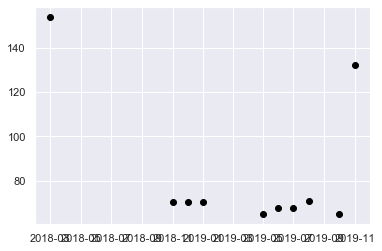

In [15]:
plot1 = plt.plot(skus.index, skus.rolling3months, 'o', color='black')

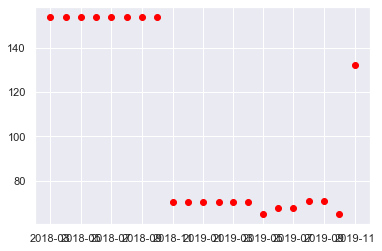

In [16]:
plot2 = plt.plot(skus_filled.index, skus_filled.rolling3months, 'o', color='red')

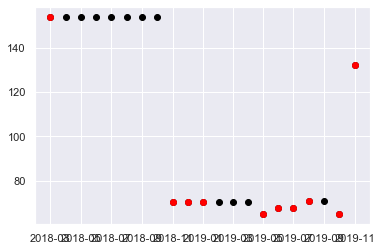

In [17]:
plt.plot(skus_filled.index, skus_filled.rolling3months, 'o', color='black')
plt.plot(skus.index, skus.rolling3months, 'o', color='red')
plt.show()

In [18]:
skus

,vendor,item_code,country,curr,rolling3months
2018-03-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-04-01,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN,NaN
2018-11-01,HPE,458928-B21,Rest of Europe,EUR,70.58
2018-12-01,HPE,458928-B21,Rest of Europe,EUR,70.58


In [19]:
skus_filled2 = skus.interpolate(method ='linear', limit_direction ='forward') 

In [20]:
skus_filled2

,vendor,item_code,country,curr,rolling3months
2018-03-01,HPE,458928-B21,Rest of Europe,EUR,153.860
2018-04-01,NaN,NaN,NaN,NaN,143.450
2018-05-01,NaN,NaN,NaN,NaN,133.040
2018-06-01,NaN,NaN,NaN,NaN,122.630
2018-07-01,NaN,NaN,NaN,NaN,112.220
2018-08-01,NaN,NaN,NaN,NaN,101.810
2018-09-01,NaN,NaN,NaN,NaN,91.400
2018-10-01,NaN,NaN,NaN,NaN,80.990
2018-11-01,HPE,458928-B21,Rest of Europe,EUR,70.580
2018-12-01,HPE,458928-B21,Rest of Europe,EUR,70.580


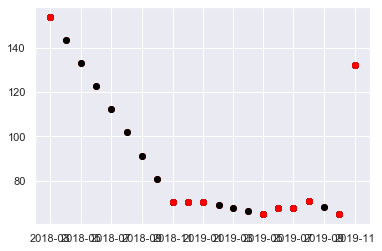

In [21]:
plot1 = plt.plot(skus.index, skus.rolling3months, 'o', color='black')
plot2 = plt.plot(skus_filled2.index, skus_filled2.rolling3months, 'o', color='red')
plt.plot(skus_filled2.index, skus_filled2.rolling3months, 'o', color='black')
plt.plot(skus.index, skus.rolling3months, 'o', color='red')
plt.show()

In [22]:
skus

,vendor,item_code,country,curr,rolling3months
2018-03-01,HPE,458928-B21,Rest of Europe,EUR,153.86
2018-04-01,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN,NaN
2018-11-01,HPE,458928-B21,Rest of Europe,EUR,70.58
2018-12-01,HPE,458928-B21,Rest of Europe,EUR,70.58


In [23]:
skus_filled3 = skus.interpolate(method ='linear', limit_direction ='backward')

In [24]:
skus_filled3

,vendor,item_code,country,curr,rolling3months
2018-03-01,HPE,458928-B21,Rest of Europe,EUR,153.860
2018-04-01,NaN,NaN,NaN,NaN,143.450
2018-05-01,NaN,NaN,NaN,NaN,133.040
2018-06-01,NaN,NaN,NaN,NaN,122.630
2018-07-01,NaN,NaN,NaN,NaN,112.220
2018-08-01,NaN,NaN,NaN,NaN,101.810
2018-09-01,NaN,NaN,NaN,NaN,91.400
2018-10-01,NaN,NaN,NaN,NaN,80.990
2018-11-01,HPE,458928-B21,Rest of Europe,EUR,70.580
2018-12-01,HPE,458928-B21,Rest of Europe,EUR,70.580


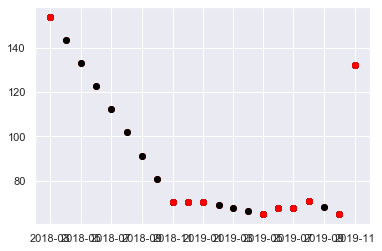

In [25]:
plot1 = plt.plot(skus.index, skus.rolling3months, 'o', color='black')
plot2 = plt.plot(skus_filled3.index, skus_filled3.rolling3months, 'o', color='red')
plt.plot(skus_filled3.index, skus_filled3.rolling3months, 'o', color='black')
plt.plot(skus.index, skus.rolling3months, 'o', color='red')
plt.show()

In [26]:
skus_filled4 = skus.interpolate(method ='values')

In [27]:
skus_filled4

,vendor,item_code,country,curr,rolling3months
2018-03-01,HPE,458928-B21,Rest of Europe,EUR,153.860000
2018-04-01,NaN,NaN,NaN,NaN,143.322531
2018-05-01,NaN,NaN,NaN,NaN,133.124980
2018-06-01,NaN,NaN,NaN,NaN,122.587510
2018-07-01,NaN,NaN,NaN,NaN,112.389959
2018-08-01,NaN,NaN,NaN,NaN,101.852490
2018-09-01,NaN,NaN,NaN,NaN,91.315020
2018-10-01,NaN,NaN,NaN,NaN,81.117469
2018-11-01,HPE,458928-B21,Rest of Europe,EUR,70.580000
2018-12-01,HPE,458928-B21,Rest of Europe,EUR,70.580000


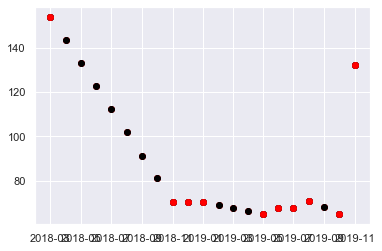

In [28]:
plot1 = plt.plot(skus.index, skus.rolling3months, 'o', color='black')
plot2 = plt.plot(skus_filled4.index, skus_filled4.rolling3months, 'o', color='red')
plt.plot(skus_filled3.index, skus_filled4.rolling3months, 'o', color='black')
plt.plot(skus.index, skus.rolling3months, 'o', color='red')
plt.show()

In [29]:
print(skus['rolling3months'].interpolate(method='pad'))

2018-03-01    153.86
2018-04-01    153.86
2018-05-01    153.86
2018-06-01    153.86
2018-07-01    153.86
2018-08-01    153.86
2018-09-01    153.86
2018-10-01    153.86
2018-11-01     70.58
2018-12-01     70.58
2019-01-01     70.58
2019-02-01     70.58
2019-03-01     70.58
2019-04-01     70.58
2019-05-01     64.94
2019-06-01     68.03
2019-07-01     68.03
2019-08-01     71.13
2019-09-01     71.13
2019-10-01     65.14
2019-11-01    132.10
Freq: MS, Name: rolling3months, dtype: float64


In [30]:
print(skus['rolling3months'].interpolate(method='values'))

2018-03-01    153.860000
2018-04-01    143.322531
2018-05-01    133.124980
2018-06-01    122.587510
2018-07-01    112.389959
2018-08-01    101.852490
2018-09-01     91.315020
2018-10-01     81.117469
2018-11-01     70.580000
2018-12-01     70.580000
2019-01-01     70.580000
2019-02-01     69.123000
2019-03-01     67.807000
2019-04-01     66.350000
2019-05-01     64.940000
2019-06-01     68.030000
2019-07-01     68.030000
2019-08-01     71.130000
2019-09-01     68.085902
2019-10-01     65.140000
2019-11-01    132.100000
Freq: MS, Name: rolling3months, dtype: float64


In [31]:
print(skus['rolling3months'].interpolate(method='time'))

2018-03-01    153.860000
2018-04-01    143.322531
2018-05-01    133.124980
2018-06-01    122.587510
2018-07-01    112.389959
2018-08-01    101.852490
2018-09-01     91.315020
2018-10-01     81.117469
2018-11-01     70.580000
2018-12-01     70.580000
2019-01-01     70.580000
2019-02-01     69.123000
2019-03-01     67.807000
2019-04-01     66.350000
2019-05-01     64.940000
2019-06-01     68.030000
2019-07-01     68.030000
2019-08-01     71.130000
2019-09-01     68.085902
2019-10-01     65.140000
2019-11-01    132.100000
Freq: MS, Name: rolling3months, dtype: float64


In [32]:
print(skus['rolling3months'].interpolate(method='nearest'))

2018-03-01    153.86
2018-04-01    153.86
2018-05-01    153.86
2018-06-01    153.86
2018-07-01    153.86
2018-08-01     70.58
2018-09-01     70.58
2018-10-01     70.58
2018-11-01     70.58
2018-12-01     70.58
2019-01-01     70.58
2019-02-01     70.58
2019-03-01     70.58
2019-04-01     64.94
2019-05-01     64.94
2019-06-01     68.03
2019-07-01     68.03
2019-08-01     71.13
2019-09-01     65.14
2019-10-01     65.14
2019-11-01    132.10
Freq: MS, Name: rolling3months, dtype: float64


In [33]:
print(skus['rolling3months'])

2018-03-01    153.86
2018-04-01       NaN
2018-05-01       NaN
2018-06-01       NaN
2018-07-01       NaN
2018-08-01       NaN
2018-09-01       NaN
2018-10-01       NaN
2018-11-01     70.58
2018-12-01     70.58
2019-01-01     70.58
2019-02-01       NaN
2019-03-01       NaN
2019-04-01       NaN
2019-05-01     64.94
2019-06-01     68.03
2019-07-01     68.03
2019-08-01     71.13
2019-09-01       NaN
2019-10-01     65.14
2019-11-01    132.10
Freq: MS, Name: rolling3months, dtype: float64


In [34]:
print(skus['rolling3months'].interpolate(method='linear'))

2018-03-01    153.860
2018-04-01    143.450
2018-05-01    133.040
2018-06-01    122.630
2018-07-01    112.220
2018-08-01    101.810
2018-09-01     91.400
2018-10-01     80.990
2018-11-01     70.580
2018-12-01     70.580
2019-01-01     70.580
2019-02-01     69.170
2019-03-01     67.760
2019-04-01     66.350
2019-05-01     64.940
2019-06-01     68.030
2019-07-01     68.030
2019-08-01     71.130
2019-09-01     68.135
2019-10-01     65.140
2019-11-01    132.100
Freq: MS, Name: rolling3months, dtype: float64


In [35]:
print(skus['rolling3months'].interpolate(method='slinear'))

2018-03-01    153.860000
2018-04-01    143.322531
2018-05-01    133.124980
2018-06-01    122.587510
2018-07-01    112.389959
2018-08-01    101.852490
2018-09-01     91.315020
2018-10-01     81.117469
2018-11-01     70.580000
2018-12-01     70.580000
2019-01-01     70.580000
2019-02-01     69.123000
2019-03-01     67.807000
2019-04-01     66.350000
2019-05-01     64.940000
2019-06-01     68.030000
2019-07-01     68.030000
2019-08-01     71.130000
2019-09-01     68.085902
2019-10-01     65.140000
2019-11-01    132.100000
Freq: MS, Name: rolling3months, dtype: float64


#### Temporary version

# Inferring causality